In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

plt.style.use('default')

## **Problem 1 to 2:**

**Dataset link:** https://rb.gy/gsmddu

**Add a label to every axis and add a proper title for the charts (For every subplot, it is applicable). Also add proper labels if there are multiple representations.** Then, you can customize it as your wish.

### **Problem-1:** Make a subplots which have 2 plots.

- For the first chart, draw a scatter plot "*Monitored Cap.(MW)*" vs "*Total Cap. Under Maintenance (MW)*" of top 5 most frequent power stations. Then draw the lines which indicate the average values of these two columns. Change the colors according to the names of the Power Stations.
- For the second chart, draw a scatter plot "*Monitored Cap. (MW)*" vs "*Actual(MU)*" of the top 5 most frequent power stations. Also draw the lines which indicates the average values of these two columns. Change the colors according to the names of the Power Stations.


In [2]:
temp = pd.read_csv('https://rb.gy/gsmddu')

df = temp.copy()

In [3]:
df.head()

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0


In [4]:
top_5_freq_ps = df['Power Station'].value_counts().nlargest(5)
top_5_freq_ps

NTPC Ltd.    9570
NHPC         5742
NPCIL        5742
GMR ENERG    5742
JSWEL        3828
Name: Power Station, dtype: int64

In [5]:
filtered_data = df[df['Power Station'].isin(top_5_freq_ps.index)]
filtered_data

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
28,2017-09-01,NHPC,4154.20,217.00,0.0,206.0,0,69,75,6.01,0.0
30,2017-09-01,NPCIL,1520.00,0.00,0.0,0.0,0,30,35,5.21,0.0
32,2017-09-01,NTPC Ltd.,12659.06,3364.66,710.0,995.0,0,182,162,-19.98,0.0
61,2017-09-01,GMR ENERG,600.00,300.00,0.0,300.0,0,9,6,-3.03,0.0
66,2017-09-01,JSWEL,1200.00,300.00,0.0,300.0,0,20,15,-4.35,0.0
...,...,...,...,...,...,...,...,...,...,...,...
345246,2022-04-13,GMR ENERG,1050.00,0.00,0.0,0.0,0,0,25,2.53,0.0
345257,2022-04-13,NHPC,862.00,146.00,0.0,0.0,146,0,11,2.76,0.0
345260,2022-04-13,NTPC Ltd.,11730.00,1105.00,500.0,500.0,105,0,246,12.26,0.0
345270,2022-04-13,NHPC,105.00,35.00,0.0,35.0,0,0,0,-0.72,0.0


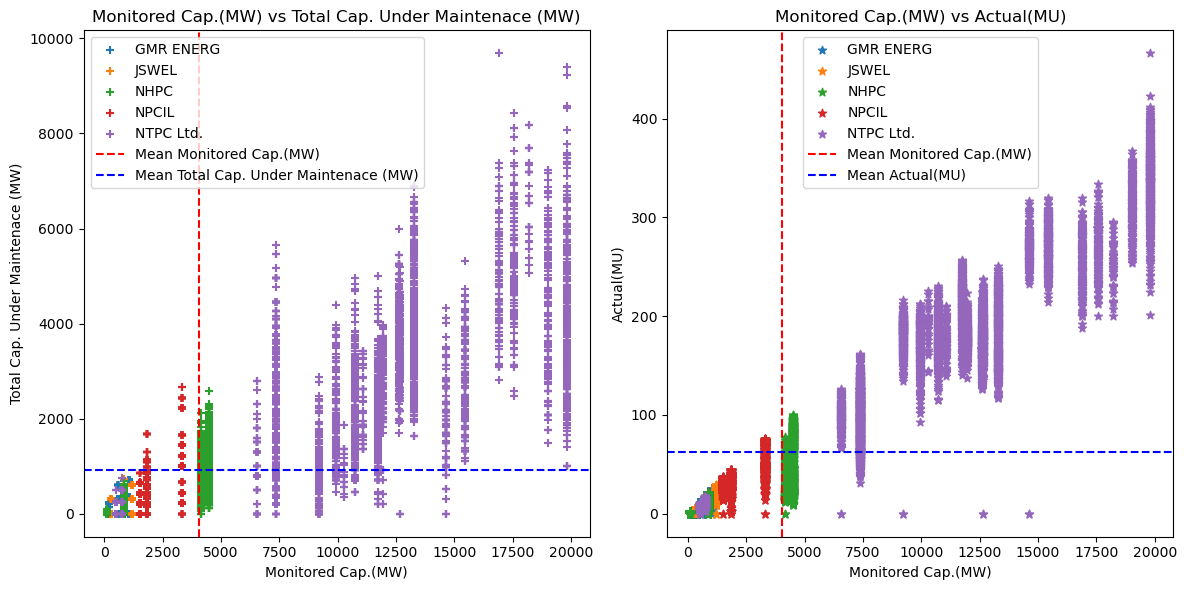

In [6]:
# 1st plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax1 = axes[0]
for name, group in filtered_data.groupby('Power Station'):
    ax1.scatter(group['Monitored Cap.(MW)'], group['Total Cap. Under Maintenace (MW)'], label=name,marker='+')

ax1.axvline(filtered_data['Monitored Cap.(MW)'].mean(), color='r', linestyle='--', label='Mean Monitored Cap.(MW)')
ax1.axhline(filtered_data['Total Cap. Under Maintenace (MW)'].mean(), 
            color='b', linestyle='--', label='Mean Total Cap. Under Maintenace (MW)')
ax1.set_xlabel('Monitored Cap.(MW)')
ax1.set_ylabel('Total Cap. Under Maintenace (MW)')
ax1.set_title('Monitored Cap.(MW) vs Total Cap. Under Maintenace (MW)')
ax1.legend()


# 2nd plot
ax2 = axes[1]
for name, group in filtered_data.groupby('Power Station'):
    ax2.scatter(group['Monitored Cap.(MW)'], group['Actual(MU)'], label=name,marker='*')
ax2.axvline(filtered_data['Monitored Cap.(MW)'].mean(), color='r', linestyle='--', label='Mean Monitored Cap.(MW)')
ax2.axhline(filtered_data['Actual(MU)'].mean(), color='b', linestyle='--', label='Mean Actual(MU)')
ax2.set_xlabel('Monitored Cap.(MW)')
ax2.set_ylabel('Actual(MU)')
ax2.set_title('Monitored Cap.(MW) vs Actual(MU)')
ax2.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()

### **Problem-2:** Draw a 3D Scatter plot between "*Monitored Cap.(MW)*", "*Total Cap. Under Maintenace (MW)*" and "*Forced Maintanence(MW)*"

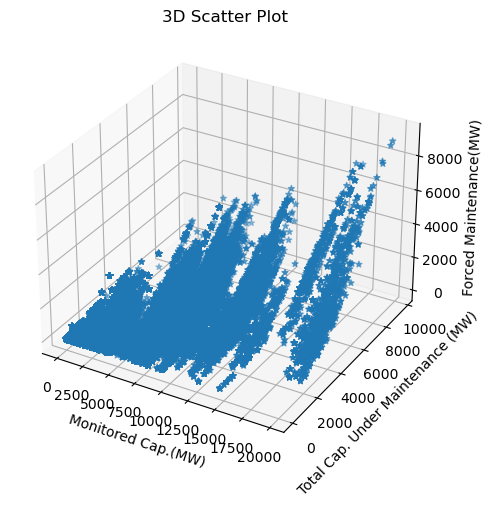

In [7]:
from mpl_toolkits.mplot3d import Axes3D

# Extract the relevant columns
x = df['Monitored Cap.(MW)']
y = df['Total Cap. Under Maintenace (MW)']
z = df['Forced Maintanence(MW)']

# Create the 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x, y, z,marker='*')

# Set labels and title
ax.set_xlabel('Monitored Cap.(MW)')
ax.set_ylabel('Total Cap. Under Maintenance (MW)')
ax.set_zlabel('Forced Maintenance(MW)')
ax.set_title('3D Scatter Plot')

# Adjust spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()


### **Problem-3:** Make a 3D *Surface* plot of this below mathematical equation.

$$z = |x| - |y|$$

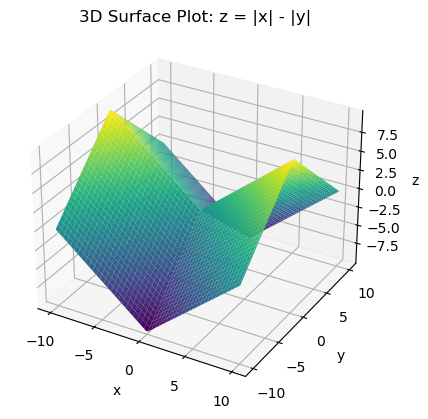

In [8]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

# Create a grid of x and y values
X, Y = np.meshgrid(x, y)

# Compute the z values based on the equation z = |x| - |y|
Z = np.abs(X) - np.abs(Y)

# Create the 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D Surface Plot: z = |x| - |y|')
plt.show()

### **Problem-4:** Draw the 3D *Contour plot* of this below equation:

$$z = |x| - |y|$$

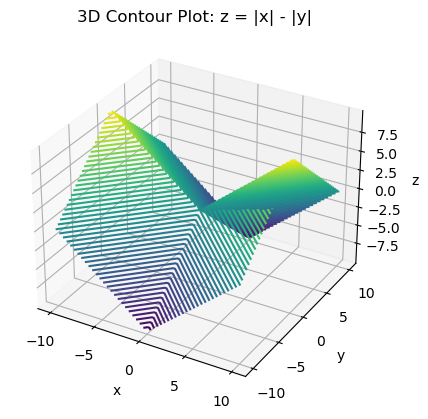

In [9]:
X, Y = np.meshgrid(x, y)

# Compute the z values based on the equation z = |x| - |y|
Z = np.abs(X) - np.abs(Y)

# Create the 3D contour plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='viridis')

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D Contour Plot: z = |x| - |y|')
plt.show()

### **Problem-5:** Draw a second type of Countour plot of the below equation:

$$z = |x| - |y|$$

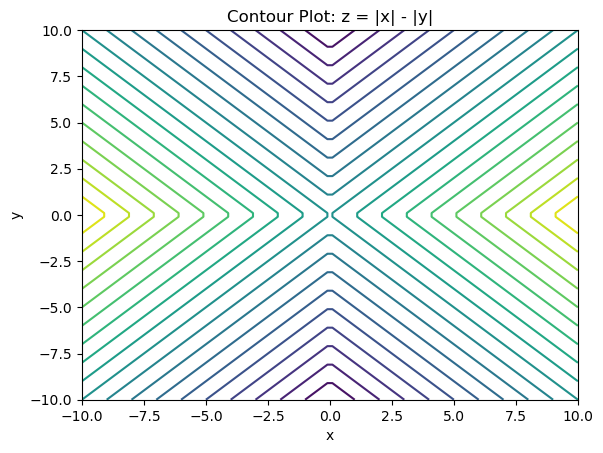

In [10]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

# Create a grid of x and y values
X, Y = np.meshgrid(x, y)

# Compute the z values based on the equation z = |x| - |y|
Z = np.abs(X) - np.abs(Y)

# Create the contour plot
plt.contour(X, Y, Z, levels=20, cmap='viridis')

# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot: z = |x| - |y|')

# Show the plot
plt.show()

## `Problem 6-7`

Data Set Link - https://docs.google.com/spreadsheets/d/17tUL2yC7MGvo7txuuhLtAI-b6_C4jc0t7FLFxqRm-uI/edit?usp=share_link


**Description of Dataset:**

* Date: It gives the date of which stocks details are given.
* Symbol: Name of stock
* Open: It gives the opening price of stock on that date.
* High: It gives the highest price to which the stock ascened on that day.
* Low: It gives the highest price to which the stock plummeted on that day.
* Close: It gives the closing price of stock on that date.
* Volume: It gives the amount of stock traded on that date.
* VWAP: The volume-weighted average price (VWAP) is a statistic used by traders to determine what the average price is based on both price and volume.
* Turnover: 

In [23]:
temp = pd.read_csv("C:\\Users\\Mahbub\\Documents\\Matplotlib\\nifty-50 - nifty-50.csv")
df = temp.copy()
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades
0,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,NaN
1,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,NaN
2,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,NaN
3,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,NaN
4,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,NaN


### `Problem-6` Use Pandas plot functions

* Line plot of closing value of top 5 Stocks in Year 2020.
* Take top 5 stocks based on total turnover in Year 2020

In [27]:
# Convert the 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Filter the data for the year 2020
data_2020 = df[df['Date'].dt.year == 2020]

# Group the data by stock symbol and calculate the total turnover for each stock
total_turnover = data_2020.groupby('Symbol')['Turnover'].sum()

# Sort the stocks based on total turnover in descending order and select the top 5 stocks
top_5_stocks = total_turnover.nlargest(5).index

# Filter the data for the top 5 stocks
top_5_data = data_2020[data_2020['Symbol'].isin(top_5_stocks)]

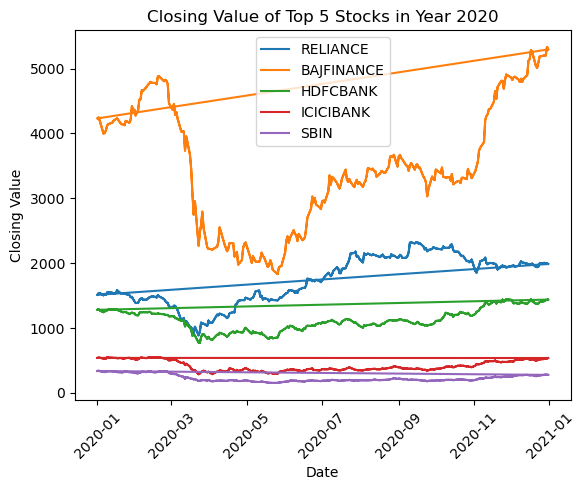

In [28]:
# Create a line plot of the closing values for each stock
fig, ax = plt.subplots()
for stock in top_5_stocks:
    stock_data = top_5_data[top_5_data['Symbol'] == stock]
    ax.plot(stock_data['Date'], stock_data['Close'], label=stock)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Closing Value')
ax.set_title('Closing Value of Top 5 Stocks in Year 2020')

# Add a legend
ax.legend()

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

### `Problem-7` Scatter plot Close price vs Volume for TOP-5 Stocks in year 2021
* Color on Symbol Column

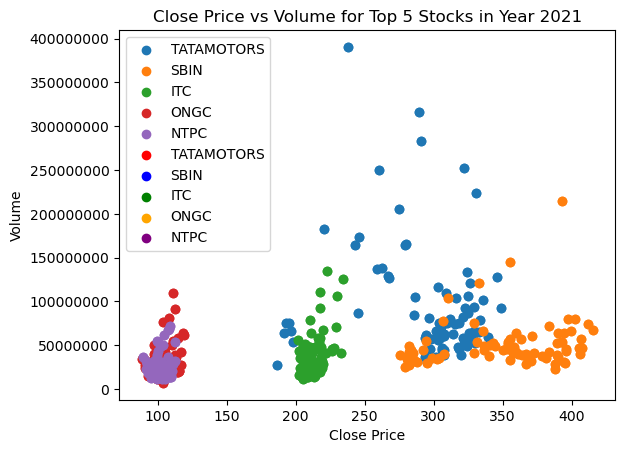

In [32]:
import matplotlib.ticker as ticker
# Filter the data for the year 2021
data_2021 = df[df['Date'].dt.year == 2021]

# Group the data by stock symbol and calculate the total volume for each stock
total_volume = data_2021.groupby('Symbol')['Volume'].sum()

# Sort the stocks based on total volume in descending order and select the top 5 stocks
top_5_stocks = total_volume.nlargest(5).index

# Filter the data for the top 5 stocks
top_5_data = data_2021[data_2021['Symbol'].isin(top_5_stocks)]

# Create a scatter plot of close price vs volume for each stock, with colors based on the symbol column
fig, ax = plt.subplots()
for stock in top_5_stocks:
    stock_data = top_5_data[top_5_data['Symbol'] == stock]
    ax.scatter(stock_data['Close'], stock_data['Volume'], label=stock)

# Set labels and title
ax.set_xlabel('Close Price')
ax.set_ylabel('Volume')
ax.set_title('Close Price vs Volume for Top 5 Stocks in Year 2021')

# Add a legend
ax.legend()

# Set different colors for each symbol
colors = ['red', 'blue', 'green', 'orange', 'purple']
for i, symbol in enumerate(top_5_stocks):
    ax.scatter([], [], color=colors[i], label=symbol)

# Show the legend with colored symbols
ax.legend()

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.0f}'))

# Display the plot
plt.show()

### `Problem-8` Create a 3-D Scatter Plot using `time,x,y` on below synthetic data. and give color gradiant on `z`
```
# Create a 3D dataset
time = np.linspace(0, 10, 100)
x = np.sin(time)
y = np.cos(time)
z = time

# Create a DataFrame from the dataset
data = pd.DataFrame({'time': time, 'x': x, 'y': y, 'z': z})
```

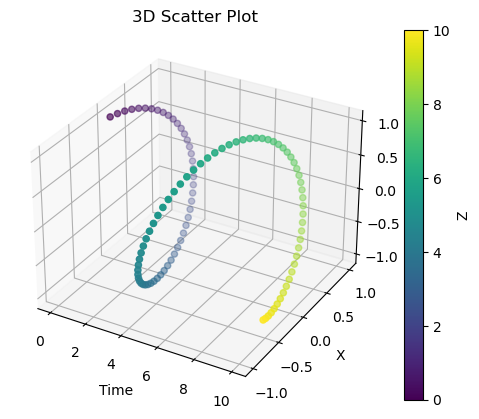

In [33]:

# Create a 3D dataset
time = np.linspace(0, 10, 100)
x = np.sin(time)
y = np.cos(time)
z = time

# Create a DataFrame from the dataset
data = pd.DataFrame({'time': time, 'x': x, 'y': y, 'z': z})

# Create the 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(data['time'], data['x'], data['y'], c=data['z'], cmap='viridis')

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('X')
ax.set_zlabel('Y')
ax.set_title('3D Scatter Plot')

# Add a color bar
cbar = plt.colorbar(ax.get_children()[0])
cbar.set_label('Z')

# Show the plot
plt.show()

### `Problem 9:` Create a surface plot and the 2 types of the contour plots of the below equation.

$$z = sin(\sqrt{x^2 + y^2})$$


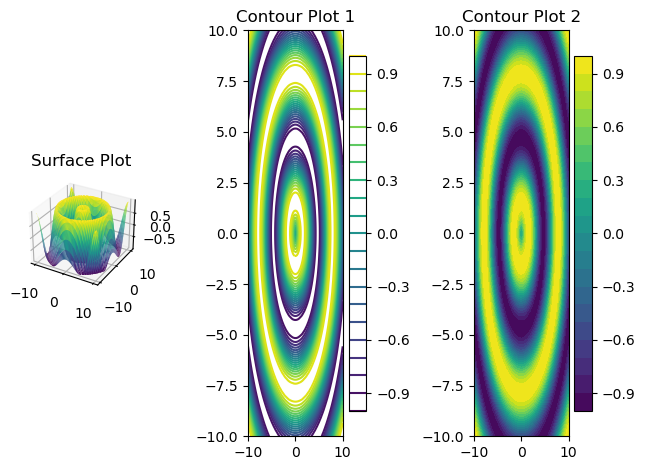

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range for x and y
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

# Create a grid of x and y values
X, Y = np.meshgrid(x, y)

# Compute the z values based on the equation z = sin(sqrt(x^2 + y^2))
Z = np.sin(np.sqrt(X**2 + Y**2))

# Create the surface plot
fig = plt.figure()

# Surface plot
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis')
ax1.set_title('Surface Plot')

# Contour plot 1
ax2 = fig.add_subplot(132)
contour1 = ax2.contour(X, Y, Z, levels=20, cmap='viridis')
ax2.set_title('Contour Plot 1')
plt.colorbar(contour1)

# Contour plot 2
ax3 = fig.add_subplot(133)
contour2 = ax3.contourf(X, Y, Z, levels=20, cmap='viridis')
ax3.set_title('Contour Plot 2')
plt.colorbar(contour2)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


### `Problem 10:` Create a surface plot and the 2 types of the contour plots of the below equation.

$$z = tan(\log_2({x^2 + y^2})$$

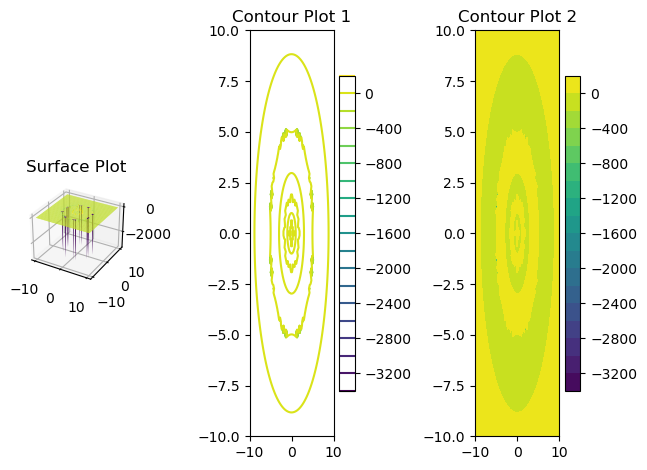

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range for x and y
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

# Create a grid of x and y values
X, Y = np.meshgrid(x, y)

# Compute the z values based on the equation z = tan(log2(x^2 + y^2))
Z = np.tan(np.log2(X**2 + Y**2))

# Create the surface plot
fig = plt.figure()

# Surface plot
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis')
ax1.set_title('Surface Plot')

# Contour plot 1
ax2 = fig.add_subplot(132)
contour1 = ax2.contour(X, Y, Z, levels=20, cmap='viridis')
ax2.set_title('Contour Plot 1')
plt.colorbar(contour1)

# Contour plot 2
ax3 = fig.add_subplot(133)
contour2 = ax3.contourf(X, Y, Z, levels=20, cmap='viridis')
ax3.set_title('Contour Plot 2')
plt.colorbar(contour2)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()
